In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('max_colwidth',10000)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [15]:
from textblob import TextBlob

from collections import Counter
from operator import itemgetter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
import dill

In [17]:
X = dill.load(open('data/matrix/X_cv_full', 'rb'))
cv = dill.load(open('data/vectors/cv_full', 'rb'))

In [18]:
# Find top 100 words that appears most frequently in all articles
vocab = np.array(cv.get_feature_names())
counts = X.toarray().sum(0)
vocab[np.argsort(-counts)[:100]]

array(['cent', 'per cent', 'apple', 'gold', 'vs', 'series', 'rs',
       'democrats', 'eu', 'iran', 'taiwan', 'revenue', 'hong kong',
       'military', 'gdp', 'series vs', 'women', 'futures', 'inflation',
       'congress', 'australia', 'steel', 'farmers', 'trillion', 'canada',
       'jobs', 'net', 'italy', 'credit', 'city', 'yields', 'republican',
       'pm', 'fxstreet', 'deficit', 'budget', 'mr', 'midterm',
       'republicans', 'euro', 'campaign', 'arabia', 'japanese', 'service',
       'saudi arabia', 'amazon', 'personal', 'rose percent', 'experience',
       'test', 'senate', 'brexit', 'twitter', 'barrel', 'korea', 'bond',
       'summit', 'democratic', 'investing', 'rally', 'region', 'imf',
       'brazil', 'auto', 'economist', 'consumers', 'nation', 'win',
       'pacific', 'order', 'session', 'visit', 'user', 'cuts', 'facebook',
       'profits', 'closed', 'alibaba', 'university', 'david',
       'volatility', 'copyright', 'singapore', 'relationship', 'strategy',
       'mex

In [19]:
countfreq = np.array(Counter(counts).most_common()).T

In [20]:
[countfreq[0,:20]]

[array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20,
        19, 21, 23])]

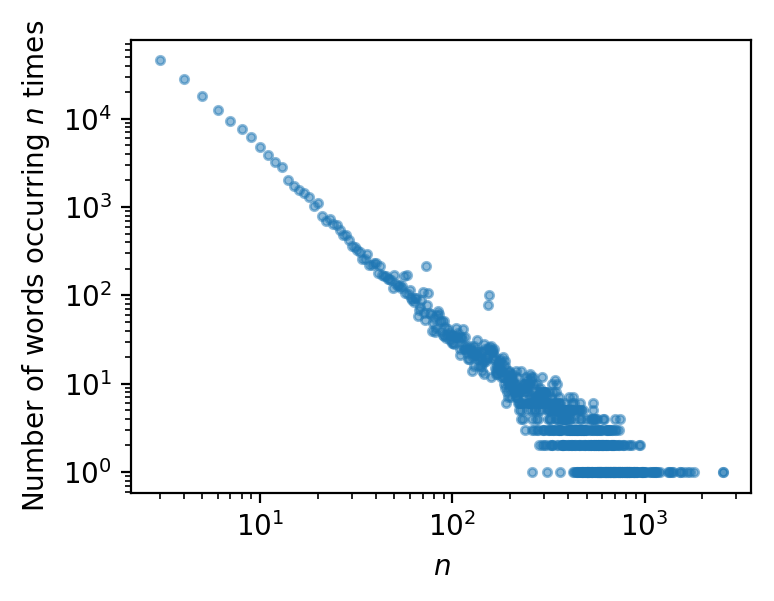

In [21]:
%config InlineBackend.figure_format = 'png'
plt.figure(dpi=200,figsize=(4,3))
plt.plot(*countfreq,'.',alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("$n$")
plt.ylabel("Number of words occurring $n$ times");

### LDA Dimension Reduction

In [22]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [23]:
n_components = 20

lda = LatentDirichletAllocation(n_components = n_components, 
                                learning_method ='online',
                                learning_decay = 0.6,
                                batch_size = 256,
                                learning_offset = 512,
                                topic_word_prior = 0.005,
                                n_jobs =  -1,
                                random_state=0)

In [24]:
lda.fit(X)

LatentDirichletAllocation(batch_size=256, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.6,
             learning_method='online', learning_offset=512,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=0.005,
             total_samples=1000000.0, verbose=0)

In [25]:
lda.perplexity(X)

48549.98139761881

In [26]:
for topic in range(n_components):
    print(f"TOPIC {topic}")
    for j in np.argsort(-lda.components_,1)[topic,:10]:
        print(vocab[j])
    print()

TOPIC 0
postal
browser
forum
javascript
javascript cookies
happening
ensure
happen
feedback
frequently

TOPIC 1
taiwan
military
sea
south sea
defense
ties
mattis
type
img
island

TOPIC 2
boeing
eu
scholz
hong kong
giants
airbus
billion imports
americans stupid
bridge
practices

TOPIC 3
lng
eu
hong kong
window
modal
expo
bridge
gas
opening
exxon

TOPIC 4
gold
vs
series
series vs
women
cent
per cent
futures
test
test series

TOPIC 5
wto
steel
canada
eu
panel
mexico
aluminum
national security
steel aluminum
canada mexico

TOPIC 6
aircraft
boeing
aviation
airbus
air
xinjiang
aerospace
commercial
jet
airshow

TOPIC 7
displayedwill
et
rs
go et
et prime
instant
get instant
miss
never miss
sip

TOPIC 8
luxury
lvmh
luxury goods
vuitton
high end
sales growth
rather
kering
consumers
shoppers

TOPIC 9
playing
amazon
need know
business insider
insider
hrs
hrs ago
playing amazon
linkedin instagram
day inbox

TOPIC 10
cent
per cent
middle
income
class
middle class
apple
consumers
pay
revenue

TOPIC 1

In [27]:
from pyLDAvis import sklearn
from pyLDAvis import display

In [28]:
viz=sklearn.prepare(lda, X, cv, R=20)
display(viz)

/Users/liuriguang/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [29]:
from sklearn.preprocessing import normalize

In [30]:
w = lda.transform(X)
w_normalized = normalize(w,axis=1,norm='l1')

In [31]:
# Generalize each topic by keywords
cols = ['economy', 
        'agriculture', 
        'aus & nz', 
        'stock market', 
        'energy resource', 
        'imf & indonesia', 
        '', 
        'taiwan strait defense', 
        'thailand & vietnam tourism',
        'aircraft',
        'investment', 
        'luxury goods', 
        'journalism', 
        'automobile', 
        'opinions',
        'wto',
        '',
        'high tech',
        'social media',
        ''
       ]
doc_topic_prob = pd.DataFrame(w_normalized,columns=cols)

In [32]:
doc_topic_prob.head(10)

,economy,agriculture,aus & nz,stock market,energy resource,imf & indonesia,,taiwan strait defense,thailand & vietnam tourism,aircraft,investment,luxury goods,journalism,automobile,opinions,wto,,high tech,social media,
0,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.998582,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075
1,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.998291,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090
2,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.998061
3,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.618156,0.000140,0.000140,0.000140,0.066822,0.000140,0.000140,0.000140,0.018148,0.294626
4,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.974012,0.000201,0.000201,0.000201,0.000201,0.000201,0.022373,0.000201,0.000201,0.000201
5,0.000173,0.000173,0.000173,0.900295,0.000173,0.000173,0.000173,0.000173,0.000173,0.000173,0.096590,0.000173,0.000173,0.000173,0.000173,0.000173,0.000173,0.000173,0.000173,0.000173
6,0.000088,0.000088,0.000088,0.000088,0.000088,0.000088,0.998327,0.000088,0.000088,0.000088,0.000088,0.000088,0.000088,0.000088,0.000088,0.000088,0.000088,0.000088,0.000088,0.000088
7,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.996107,0.000205,0.000205,0.000205
8,0.000203,0.000203,0.000203,0.876606,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.119735,0.000203,0.000203,0.000203,0.000203,0.000203
9,0.000106,0.000106,0.000106,0.000106,0.000106,0.005579,0.000106,0.000106,0.000106,0.000106,0.301717,0.000106,0.000106,0.000106,0.690907,0.000106,0.000106,0.000106,0.000106,0.000106


In [33]:
doc_topic_prob.shape

(5891, 20)

In [36]:
dill.dump(lda, open('data/lda/lda','wb'))
doc_topic_prob.to_csv('data/doc_topic_prob.csv')